In [1]:
#Import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sb
import joblib

In [2]:
#Import the dataset and split the data into training(INPUT) and testing(OUTPUT) sets.
#Rename input_data to training_data? and output_data to testing_data?
input_data, output_data = fetch_openml("mnist_784", return_X_y=True, as_frame=False, version=1)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
#Use the StandardScaler to scale the training features. 
sscaler = StandardScaler()
input_data = sscaler.fit_transform(input_data)

In [4]:
#Split the data into training and testing inputs and outputs.
train_images, test_images, train_labels, test_labels = train_test_split(input_data, output_data, test_size=.15, random_state=22)
print(input_data.shape)
print(output_data.shape)

(70000, 784)
(70000,)


In [5]:
#Create and traing the Logistic Regression model with the input data.
lg_model = LogisticRegression(solver='lbfgs', max_iter=1000)
lg_model.fit(train_images, train_labels)

LogisticRegression(max_iter=1000)

In [6]:
lg_model.predict(test_images[0].reshape(1,-1))


array(['6'], dtype=object)

In [38]:
print(test_images[0].reshape(1,-1).shape)

(1, 784)


In [8]:
#Calculate and return the accuracy of the model.
target_predictions = lg_model.predict(test_images)
accuracy = accuracy_score(test_labels, target_predictions)
print(accuracy)

0.918


In [9]:
#Create and view the defeault confusion matrix. Then, create a matplotlib plot to clearly map the confusion matrix.
cm = metrics.confusion_matrix(test_labels, target_predictions)
print(cm)

[[ 986    0    7    2    3   11   10    2    7    1]
 [   0 1154    8    5    1    6    2    5   17    1]
 [   6   15  934   24    9    6   12    8   17    6]
 [   5    6   18  923    3   29    3   12   15    8]
 [   1    4    8    6  934    0    7    9    4   27]
 [   7    2   10   28   11  834   17    5   25    5]
 [  12    6    9    1   14   19  929    1    7    1]
 [   5    7   15    7    8    1    1 1048    5   43]
 [   5   19   18   29    4   30    9    3  924   21]
 [   3    2    4   20   21    6    0   30    9  973]]


Text(0.5, 1.0, 'Accuracy Score: 0.918')

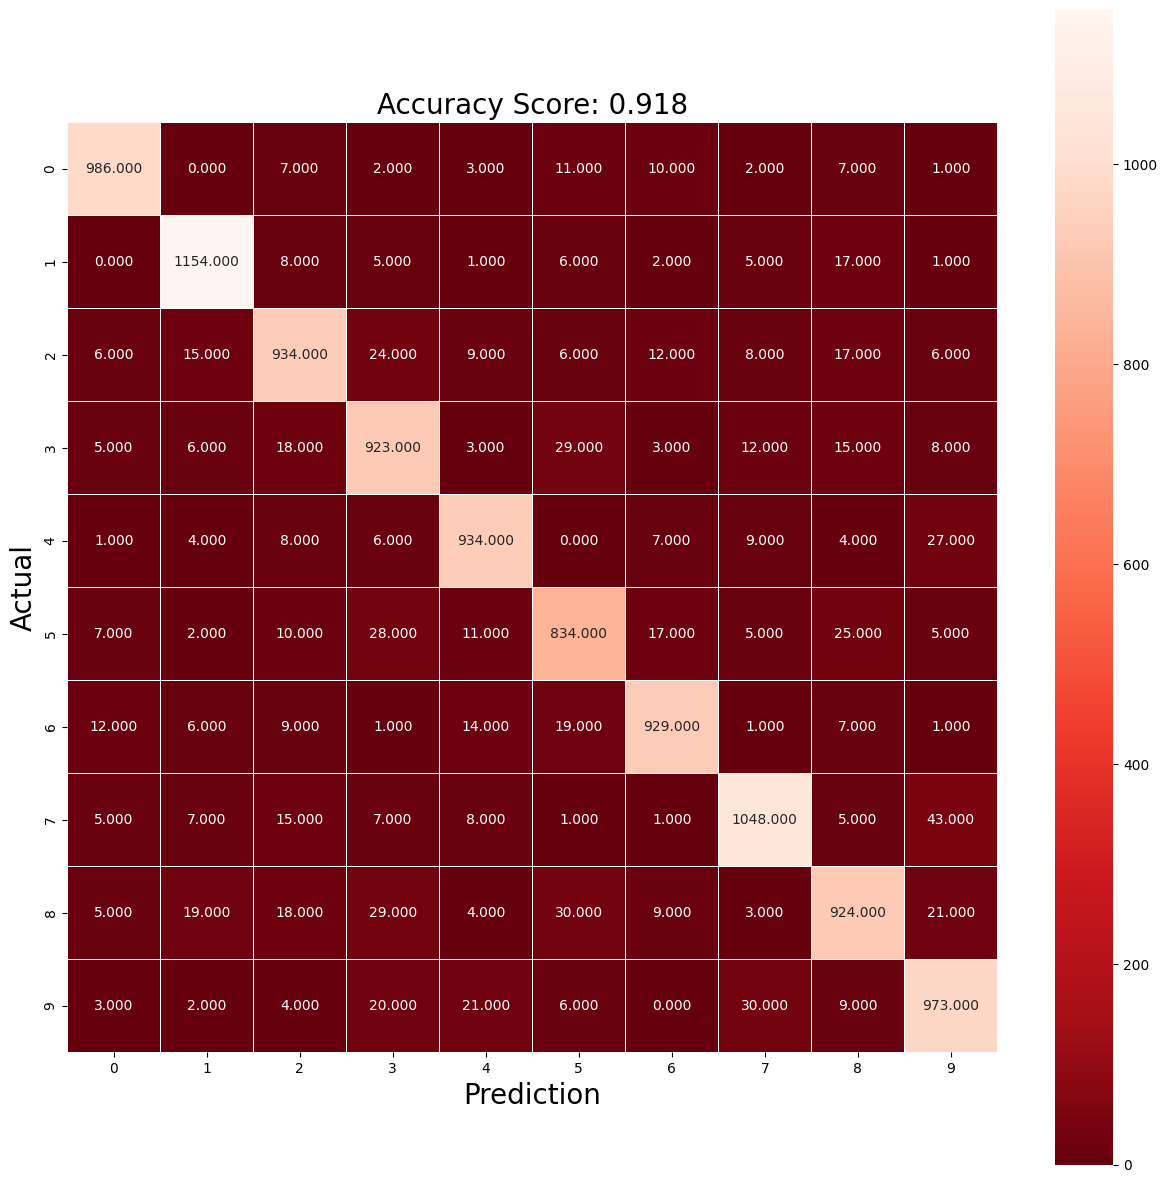

In [10]:
plt.figure(figsize=(15,15))
sb.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r')
plt.ylabel('Actual', size=20)
plt.xlabel('Prediction', size=20)
title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(title, size = 20)

In [ ]:
filename = "sklearn_mnist.joblib"
joblib.dump(lg_model, filename)

['sklearn_mnist.joblib']

In [26]:
import numpy as np

In [43]:
sample_input=np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.011764705882352941, 0.07058823529411765, 0.07058823529411765, 0.07058823529411765, 0.49411764705882355, 0.5333333333333333, 0.6862745098039216, 0.10196078431372549, 0.6509803921568628, 1.0, 0.9686274509803922, 0.4980392156862745, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11764705882352941, 0.1411764705882353, 0.3686274509803922, 0.6039215686274509, 0.6666666666666666, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.8823529411764706, 0.6745098039215687, 0.9921568627450981, 0.9490196078431372, 0.7647058823529411, 0.25098039215686274, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19215686274509805, 0.9333333333333333, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.984313725490196, 0.36470588235294116, 0.3215686274509804, 0.3215686274509804, 0.2196078431372549, 0.15294117647058825, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07058823529411765, 0.8588235294117647, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.7764705882352941, 0.7137254901960784, 0.9686274509803922, 0.9450980392156862, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3137254901960784, 0.611764705882353, 0.4196078431372549, 0.9921568627450981, 0.9921568627450981, 0.803921568627451, 0.043137254901960784, 0.0, 0.16862745098039217, 0.6039215686274509, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.054901960784313725, 0.00392156862745098, 0.6039215686274509, 0.9921568627450981, 0.35294117647058826, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5450980392156862, 0.9921568627450981, 0.7450980392156863, 0.00784313725490196, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.043137254901960784, 0.7450980392156863, 0.9921568627450981, 0.27450980392156865, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13725490196078433, 0.9450980392156862, 0.8823529411764706, 0.6274509803921569, 0.4235294117647059, 0.00392156862745098, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3176470588235294, 0.9411764705882353, 0.9921568627450981, 0.9921568627450981, 0.4666666666666667, 0.09803921568627451, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17647058823529413, 0.7294117647058823, 0.9921568627450981, 0.9921568627450981, 0.5882352941176471, 0.10588235294117647, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06274509803921569, 0.36470588235294116, 0.9882352941176471, 0.9921568627450981, 0.7333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9764705882352941, 0.9921568627450981, 0.9764705882352941, 0.25098039215686274, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1803921568627451, 0.5098039215686274, 0.7176470588235294, 0.9921568627450981, 0.9921568627450981, 0.8117647058823529, 0.00784313725490196, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15294117647058825, 0.5803921568627451, 0.8980392156862745, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.9803921568627451, 0.7137254901960784, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09411764705882353, 0.4470588235294118, 0.8666666666666667, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.788235294117647, 0.3058823529411765, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09019607843137255, 0.25882352941176473, 0.8352941176470589, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.7764705882352941, 0.3176470588235294, 0.00784313725490196, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07058823529411765, 0.6705882352941176, 0.8588235294117647, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.7647058823529411, 0.3137254901960784, 0.03529411764705882, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.21568627450980393, 0.6745098039215687, 0.8862745098039215, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.9568627450980393, 0.5215686274509804, 0.043137254901960784, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5333333333333333, 0.9921568627450981, 0.9921568627450981, 0.9921568627450981, 0.8313725490196079, 0.5294117647058824, 0.5176470588235295, 0.06274509803921569, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
lg_model.predict(sample_input.reshape(1,-1))

array(['5'], dtype=object)

In [47]:
print(sample_input.reshape(1,-1).shape)

(1, 784)


In [50]:
print(sample_input.shape)

(784,)
